In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from six import StringIO
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('data/cleaned_data.csv')

In [4]:
X = df.drop(['annotate'], axis=1)
y = df.annotate

In [10]:
#onehotencode of whole thing to visualize feature importance

In [8]:
categoricals = ['commod', 'commtype', 'lab', 'pestcode', 'avg_detect']

In [9]:
encoder= OneHotEncoder(categories = 'auto', handle_unknown='ignore')
encoder = encoder.fit(X[categoricals])
encoder

OneHotEncoder(categorical_features=None, categories='auto', drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=True)

In [14]:
en = encoder.transform(X[categoricals])

ohe = pd.DataFrame(en.toarray(), 
                  columns=encoder.get_feature_names())
ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4887 entries, 0 to 4886
Columns: 184 entries, x0_AJ to x4_R
dtypes: float64(184)
memory usage: 6.9 MB


In [16]:
#combine all variables
enc_X = X.join(ohe).drop(categoricals, axis=1)
enc_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4887 entries, 0 to 4886
Columns: 189 entries, sample_pk to x4_R
dtypes: float64(186), int64(3)
memory usage: 7.0 MB


In [17]:
enc_X.fillna(0, inplace=True)

In [20]:
enc_X.head()

,sample_pk,lod,extract,determin,concentration,x0_AJ,x0_BR,x0_BU,x0_CE,x0_CF,...,x3_B72,x3_B75,x3_B77,x3_B79,x3_B80,x3_B82,x3_B84,x3_B85,x4_O,x4_R
0,239,0.005,805,35,80000.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1183,0.010,805,52,110000.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1196,0.010,805,52,130000.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1230,0.005,805,35,350000.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1269,0.010,805,52,260000.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


[4.10525183e-02 1.94485636e-02 9.76051733e-06 6.92144637e-03
 1.22645150e-01 1.06941714e-09 2.06636703e-02 1.92289951e-03
 1.06606961e-02 5.68338783e-03 3.79821224e-03 3.31425452e-02
 5.13585322e-04 4.14201561e-04 1.30370857e-02 4.34650874e-03
 4.78954770e-03 1.09262012e-02 4.61370294e-02 1.04996308e-02
 2.12789450e-02 1.02079316e-06 1.01294319e-04 1.28809993e-02
 1.71113476e-04 1.97826865e-03 4.30462859e-03 6.89575634e-06
 2.34012083e-03 1.74763131e-02 2.33632963e-03 4.32028724e-02
 1.03211004e-05 1.78769369e-03 3.37478705e-03 3.24126719e-03
 1.70090103e-02 1.14526334e-02 1.10173321e-06 1.82906476e-04
 5.79330111e-07 9.70410047e-04 0.00000000e+00 0.00000000e+00
 6.33270810e-03 2.20455729e-06 3.07404162e-04 2.62065270e-03
 3.94280391e-02 1.46199785e-03 5.86832982e-05 2.13173748e-02
 8.74256347e-08 4.29697970e-04 0.00000000e+00 5.38264740e-04
 1.64858195e-01 1.93055458e-05 8.65265686e-05 5.88513816e-03
 1.69256135e-04 3.20379955e-03 6.29243801e-06 1.60364671e-06
 1.54628690e-03 1.711883

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


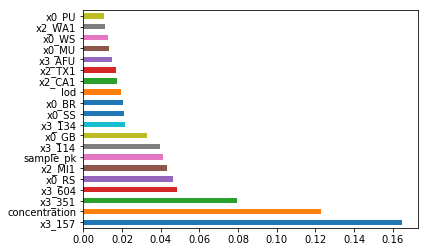

In [19]:
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(enc_X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=enc_X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()